# CTA200H Assignment 2 - Anatoly Zavyalov

## Question 1

Here, we define two functions `deriv_1` and `deriv_2` that approximate the derivative of the function $f$ using the two methods of approximation.

In [37]:
def deriv_1(f: any, x0: float, h: float) -> float:
    """
    Return an approximation of the derivative of function f at x0, with stepsize h, 
    using the first method of approximation.
    
    Preconditions:
    - f is a Python function that accepts x0 as input and returns a float
    - 0 < h < 1
    """
    
    return (f(x0 + h) - f(x0)) / h

def deriv_2(f: any, x0: float, h: float) -> float:
    """
    Return an approximation of the derivative of function f at x0, with stepsize h, 
    using the second method of approximation.
    
    Preconditions:
    - f is a Python function that accepts x0 as input and returns a float
    - 0 < h < 1
    """
    return (f(x0 + h) - f(x0 - h)) / (2 * h)

We see that the functions accurately approximate the derivative with small values of $h$:

In [38]:
import numpy as np

print("Approximation 1:", deriv_1(np.sin, 0.1, 0.0001))
print("Approximation 2:", deriv_2(np.sin, 0.1, 0.0001))
print("Analytical:     ", np.cos(0.1))

Approximation 1: 0.9949991719489237
Approximation 2: 0.9950041636197504
Analytical:      0.9950041652780258


We then find the error of the functions by trying different values of $h$, and plot them using `matplotlib`:

<IPython.core.display.Javascript object>


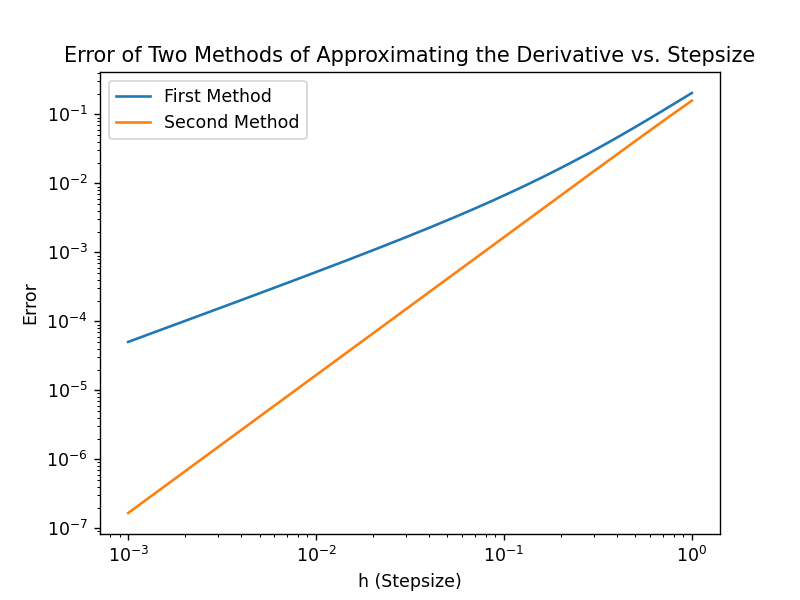

In [57]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

def find_error(f: any, d: any, x0: float, h: float, type: int) -> float:
    """
    Find the error of f's derivative approximation to the actual derivative, d, given x0 and h.
    
    If type is 1, use deriv_1. Otherwise, use deriv_2.
    
    Preconditions:
     - f is a differentiable function, where d is the derivative of f
     - x0 is in the domain of f and d
     - 0 < h < 1
     - type in {1, 2}
    """
    
    # Find the derivative approximation of f at x0 with stepsize h
    if type == 1:
        numerical = deriv_1(f, x0, h)
    else: 
        # Preconditions assume that type is 2 if not 1
        # assert type == 2
        numerical = deriv_2(f, x0, h)
    
    # Find actual derivative of f at x0
    analytic = d(x0)
    
    # Return error
    return abs(numerical - analytic) / analytic


# The value at which the functions will be evaluated
x0 = 0.1

# Step for the value of h (start at step, increment by step, end at 1-step)
step = 0.001

# Range of the h values to test
r = np.arange(step, 1, step)

# ACCUMULATOR: Values of find_error at each step so far, using both types
vals_so_far_1 = []
vals_so_far_2 = []

f = np.sin
d = np.cos


# Test different values of stepsize h
for h in r:
    vals_so_far_1.append(find_error(f, d, x0, h, 1))
    vals_so_far_2.append(find_error(f, d, x0, h, 2))
    

plt.title("Error of Two Methods of Approximating the Derivative vs. Stepsize")
plt.xlabel("h (Stepsize)")
plt.ylabel("Error")
plt.loglog(r, vals_so_far_1, label="First Method")
plt.loglog(r, vals_so_far_2, label="Second Method")
plt.legend()
plt.show()

#### Observations
We see that the absolute error of the two methods of approximations have the same approximate innacuracy when the stepsize is high, but the second method of approximation is more accurate by orders of magnitude when the stepsize is decreased.

The slope of the error vs. stepsize plot represents how rapidly the method becomes more innacurate as the stepsize is increased.

---

## Question 2

We will use the PIL module to generate the image within Python. First, we test the module.

The below code is inspired by https://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook and https://stackoverflow.com/questions/2659312/how-do-i-convert-a-numpy-array-to-and-display-an-image.

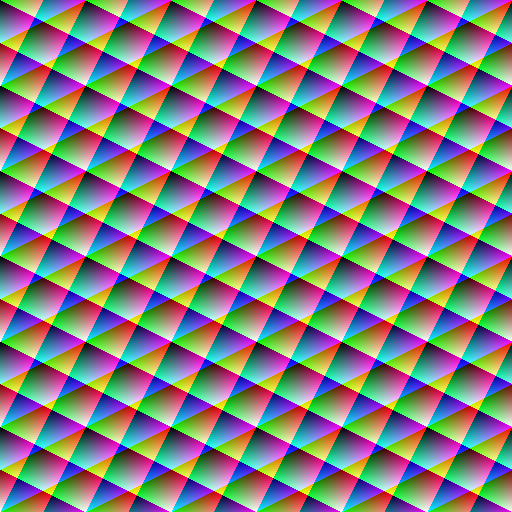

In [94]:
from PIL import Image 
from IPython.display import display
import numpy as np

# 512 by 512 image
w, h = 512, 512

# Create a 2-dimensional 512x512 array with [0,0,0] at each index
data = np.zeros((h, w, 3), dtype=np.uint8)

# Make a cool pattern
for x in range(w):
    for y in range(h):
        data[x, y] = [3 * (x + 2 * y), 3 * (2 * x - y), 3 * (2 * x + y)]
        
img = Image.fromarray(data, 'RGB')
img.show()

Now, we DRAW THE MANDELBROT SET!!!!!! :D :D :D :D

The following is just a two-colored Mandelbrot set:

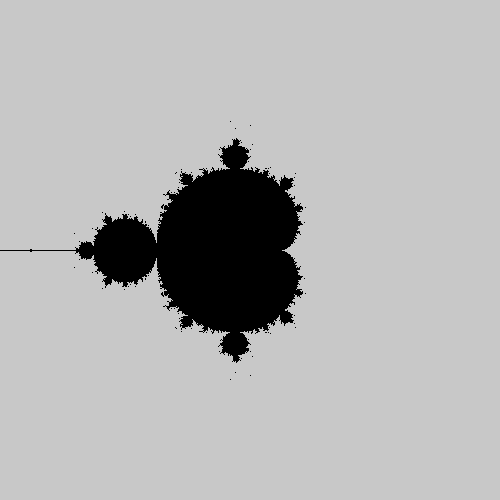

In [134]:
from PIL import Image 
from IPython.display import display
import numpy as np

# Image dimensions
w, h = 500, 500

# Create a 2-dimensional 512x512 array with [0,0,0] at each index
data = np.zeros((h, w, 3), dtype=np.uint8)

# Threshold for determining if the sequence diverges.
threshold = 4

# Maximum number of times to iterate
max_iteration = 50


x_bounds = (-2, 2)
y_bounds = (-2, 2)


for x in range(w):
    for y in range(h):
        
        # Convert the image coordinates to the view coordinates
        actual_x = x_bounds[0] + x * (x_bounds[1] - x_bounds[0]) / w
        actual_y = y_bounds[0] + y * (y_bounds[1] - y_bounds[0]) / h
        
        c = complex(actual_x, actual_y)
        
        curr_z = 0
        
        bounded = True
        
        for _ in range(max_iteration):
            next_z = curr_z**2 + c
        
            
            if abs(next_z) > threshold:
                bounded = False
                break
            
            curr_z = next_z
        
        if bounded:
            pass
        else:
            data[y, x] = [200, 200, 200]

img = Image.fromarray(data, 'RGB')
img.show()